# Cats and Dogs Image Classifier using TensorFlow Keras

* Using [Miscrosoft Kaggle Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765) for training the model
* Following along the tutorial of [Deep Lizard](https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from google.colab import drive
import random
import shutil
import glob
import os
import itertools
import matplotlib.pyplot as plt

> Using my personal google drive for the dataset (also convenience) since I'm using Google Colab to run TensorFlow

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/My\ Drive/datasets/dogsandcats
!pwd

/content/drive/My Drive/datasets/dogsandcats
/content/drive/My Drive/datasets/dogsandcats


In [15]:
import glob

glob.glob("./*.docx")

['./MSR-LA - 3467.docx']

### Partitioning the data into Train, Validation & Test sets

* Using only a fraction of the 25000 dataset to train the model

In [16]:
if os.path.isdir('./train') is False:
  os.makedirs('partition/train/dog')
  os.makedirs('partition/train/cat')
  os.makedirs('partition/valid/dog')
  os.makedirs('partition/valid/cat')
  os.makedirs('partition/test/dog')
  os.makedirs('partition/test/cat')

  for i in random.sample(glob.glob("./Cat/*.jpg"), 500):
    shutil.move(i, 'partition/train/cat')
  for i in random.sample(glob.glob("./Dog/*.jpg"), 500):
    shutil.move(i, 'partition/train/dog')
  for i in random.sample(glob.glob("./Cat/*.jpg"), 100):
    shutil.move(i, 'partition/valid/cat')
  for i in random.sample(glob.glob("./Dog/*.jpg"), 100):
    shutil.move(i, 'partition/valid/dog')
  for i in random.sample(glob.glob("./Cat/*.jpg"), 50):
    shutil.move(i, 'partition/test/cat')
  for i in random.sample(glob.glob("./Dog/*.jpg"), 50):
    shutil.move(i, 'partition/test/dog')

In [17]:
train_path = "./partition/train"
test_path = "./partition/test"
valid_path = "./partition/valid"

#### Preprocessing the images with VGG16

In [18]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [19]:
imgs, labels = next(train_batches)

In [20]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

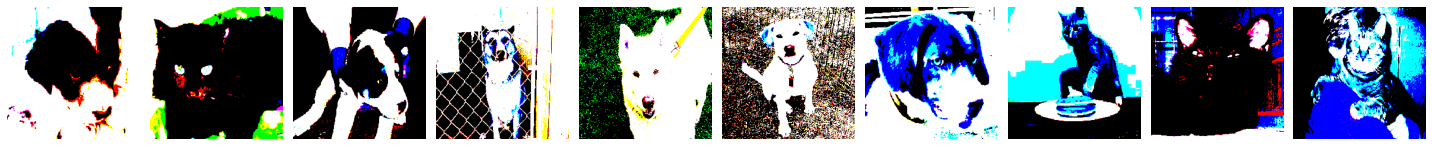

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
plotImages(imgs)
print(labels)

#### Initializing the CNN model

In [22]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3,), activation='relu', padding='same', input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Flatten(),
                    Dense(units=2, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
100/100 - 323s - loss: 19.5580 - accuracy: 0.5460 - val_loss: 6.6243 - val_accuracy: 0.5900
Epoch 2/10
100/100 - 72s - loss: 2.7403 - accuracy: 0.7480 - val_loss: 3.2488 - val_accuracy: 0.6400
Epoch 3/10
100/100 - 72s - loss: 0.9744 - accuracy: 0.8680 - val_loss: 2.3237 - val_accuracy: 0.6650
Epoch 4/10
100/100 - 72s - loss: 0.2301 - accuracy: 0.9360 - val_loss: 2.2374 - val_accuracy: 0.6700
Epoch 5/10
100/100 - 72s - loss: 0.0346 - accuracy: 0.9890 - val_loss: 1.9547 - val_accuracy: 0.6700
Epoch 6/10
100/100 - 72s - loss: 0.0138 - accuracy: 0.9940 - val_loss: 2.6783 - val_accuracy: 0.6400
Epoch 7/10
100/100 - 72s - loss: 0.0088 - accuracy: 0.9980 - val_loss: 1.8334 - val_accuracy: 0.6900
Epoch 8/10
100/100 - 72s - loss: 5.8528e-04 - accuracy: 1.0000 - val_loss: 1.8070 - val_accuracy: 0.7050
Epoch 9/10
100/100 - 72s - loss: 4.0146e-04 - accuracy: 1.0000 - val_loss: 1.8176 - val_accuracy: 0.6850
Epoch 10/10
100/100 - 72s - loss: 3.3125e-04 - accuracy: 1.0000 - val_loss: 1.818

## Testing the model

In [26]:
testimgs, testlabels = next(test_batches)
plotImages(testimgs)
print(testlabels)

In [28]:
predictions = model.predict(x=test_batches, verbose=0)

In [35]:
np.round(predictions)[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [32]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [34]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix without Normalization')

  print(cm)

  thresh  = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

In [39]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix without Normalization
[[32 18]
 [18 32]]


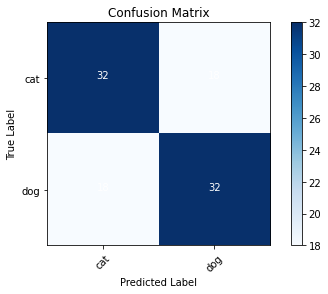

In [43]:
cm_plot_labels = list(test_batches.class_indices.keys())
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Using the pretrained VGG16 model

In [44]:
vgg16 = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [49]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [46]:
type(vgg16)

tensorflow.python.keras.engine.functional.Functional

In [47]:
model = Sequential()
for layer in vgg16.layers[:-1]:
  model.add(layer)

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [50]:
for layer in model.layers:
  layer.trainable = False

In [51]:
model.add(Dense(units=2, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          epochs=5,
          verbose=2)

Epoch 1/5
100/100 - 639s - loss: 0.5461 - accuracy: 0.7700 - val_loss: 0.1734 - val_accuracy: 0.9250
Epoch 2/5
100/100 - 630s - loss: 0.1088 - accuracy: 0.9600 - val_loss: 0.1134 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 621s - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.0952 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 622s - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0849 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 621s - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0822 - val_accuracy: 0.9750


#### Predictions using the VGG16 model

In [55]:
predictions = model.predict(x=test_batches, verbose=0)

In [56]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion Matrix without Normalization
[[48  2]
 [ 0 50]]


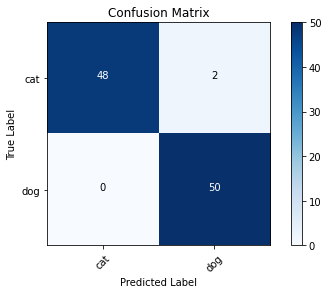

In [57]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')